In [1]:
# loading all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split
from keras.constraints import maxnorm
from keras import optimizers
from keras import regularizers
from keras.constraints import maxnorm
from keras.layers import Dropout, BatchNormalization
from pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
BackOrders = pd.read_csv("/content/drive/My Drive/Colab_Folder/BackOrders.csv", na_values=["?",","])
BackOrders.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [5]:
BackOrders.describe() # missing values in lead_time

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.158900e+04,61589.000000,58186.000000,61589.000000,6.158900e+04,6.158900e+04,6.158900e+04,61589.000000,61589.000000,6.158900e+04,6.158900e+04,61589.000000,61589.000000,61589.000000,61589.000000,61589.000000
mean,2.037188e+06,287.721882,7.559619,30.192843,1.692728e+02,3.150413e+02,4.535760e+02,44.742957,150.732631,2.835465e+02,4.196427e+02,43.087256,1.605400,-6.264182,-5.863664,1.205361
std,6.564178e+05,4233.906931,6.498952,792.869253,5.286742e+03,9.774362e+03,1.420201e+04,1373.805831,5224.959649,8.872270e+03,1.269858e+04,959.614135,42.309229,25.537906,24.844514,29.981155
min,1.068628e+06,-2999.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.498574e+06,3.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.620000,0.640000,0.000000
50%,1.898033e+06,10.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000,4.000000e+00,6.000000e+00,0.000000,0.000000,0.820000,0.800000,0.000000
75%,2.314826e+06,57.000000,8.000000,0.000000,1.200000e+01,2.500000e+01,3.600000e+01,6.000000,17.000000,3.400000e+01,5.100000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.284895e+06,673445.000000,52.000000,170976.000000,1.126656e+06,2.094336e+06,3.062016e+06,295197.000000,934593.000000,1.799099e+06,2.631590e+06,192978.000000,7392.000000,1.000000,1.000000,2999.000000


Exploratory analysis to impute lead time

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


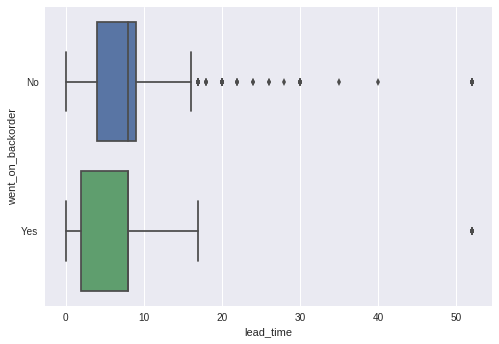

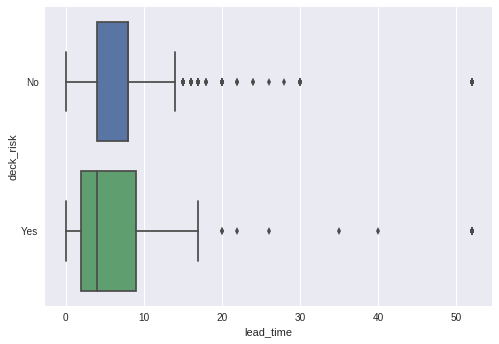

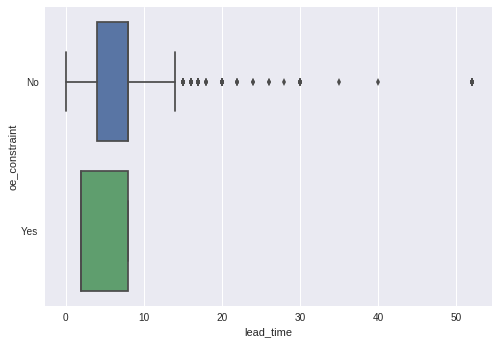

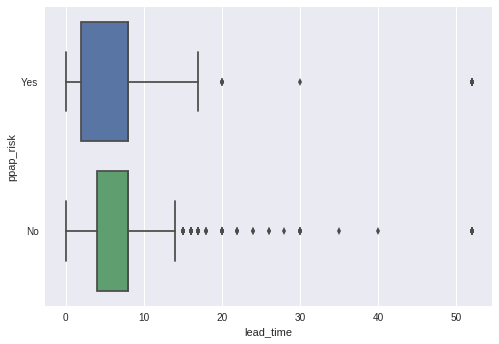

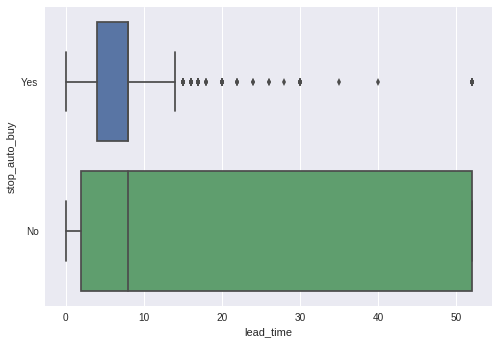

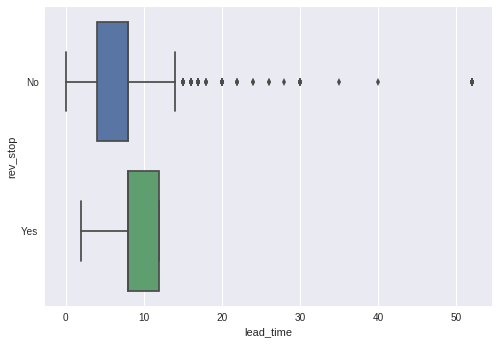

In [6]:
columns = ["went_on_backorder", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop"]

for col in columns:
  plt.figure()
  sns.boxplot(x="lead_time", y=col, data=BackOrders)



Evaluating fields hich can be used to impute lead time NA values

In [7]:
print(BackOrders.groupby('stop_auto_buy', as_index=False)['lead_time'].mean())
print(BackOrders.groupby('rev_stop', as_index=False)['lead_time'].mean())
print(BackOrders.groupby('oe_constraint', as_index=False)['lead_time'].mean())
print(BackOrders.groupby(['stop_auto_buy', 'oe_constraint'], as_index=False)['lead_time'].mean())
print(BackOrders.groupby(['stop_auto_buy', 'rev_stop'], as_index=False)['lead_time'].mean())
print(BackOrders.groupby(['rev_stop', 'oe_constraint'], as_index=False)['lead_time'].mean())
print(BackOrders.groupby(['stop_auto_buy', 'rev_stop', 'oe_constraint'], as_index=False)['lead_time'].mean())

  stop_auto_buy  lead_time
0            No  17.137931
1           Yes   7.314827
  rev_stop  lead_time
0       No   7.559555
1      Yes   7.846154
  oe_constraint  lead_time
0            No   7.560353
1           Yes   4.000000
  stop_auto_buy oe_constraint  lead_time
0            No            No  17.137931
1           Yes            No   7.315528
2           Yes           Yes   4.000000
  stop_auto_buy rev_stop  lead_time
0            No       No  17.194444
1            No      Yes   9.000000
2           Yes       No   7.315002
3           Yes      Yes   4.000000
  rev_stop oe_constraint  lead_time
0       No            No   7.560290
1       No           Yes   4.000000
2      Yes            No   7.846154
  stop_auto_buy rev_stop oe_constraint  lead_time
0            No       No            No  17.194444
1            No      Yes            No   9.000000
2           Yes       No            No   7.315703
3           Yes       No           Yes   4.000000
4           Yes      Yes          

Imputing lead_time

In [0]:

BackOrders['lead_time'] = BackOrders.groupby(['stop_auto_buy', 'rev_stop', 'oe_constraint'])['lead_time'].transform(lambda x: x.fillna(x.mean()))


Changing datatype of objects column to categories for dummification later on

In [0]:

def dtype_Convert(dtp1, col, data):
    for i in range(len(dtp1)):
        if dtp1[i] == "object":
            data[col[i]]=data[col[i]].astype('category')

In [0]:
dtp = pd.Series(BackOrders.dtypes)
dtp1 = dtp.tolist()
col = BackOrders.columns.tolist()

In [0]:
dtype_Convert(dtp1, col, BackOrders)

Outlier detection and treatment

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


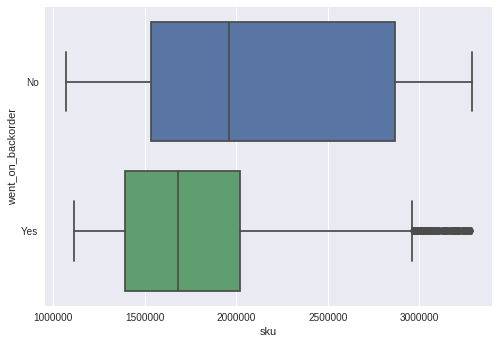

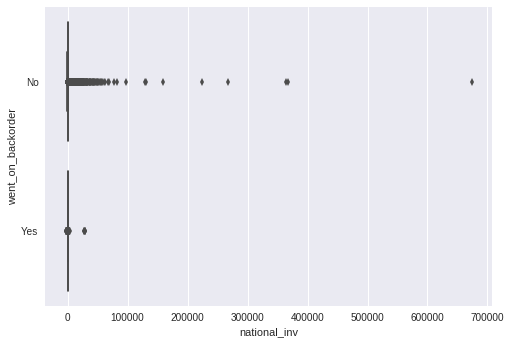

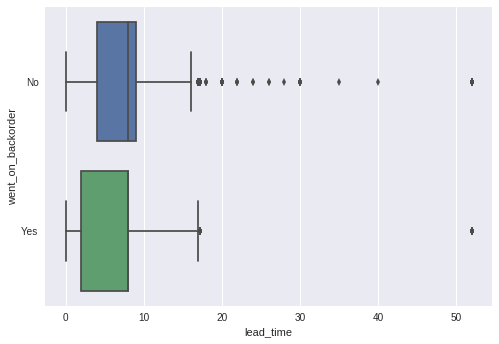

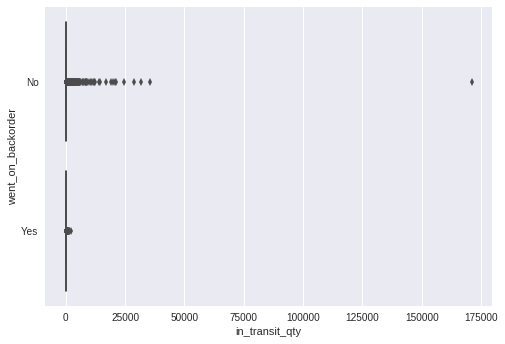

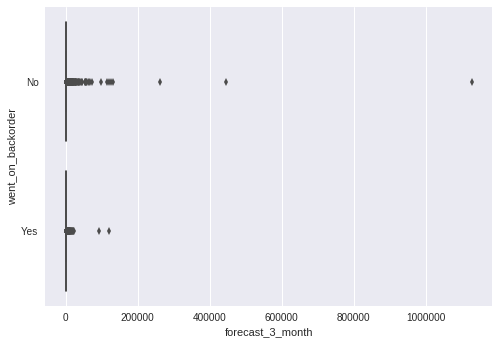

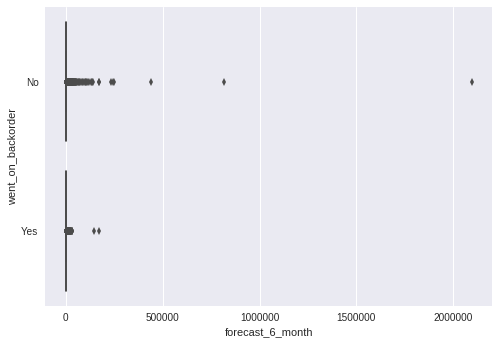

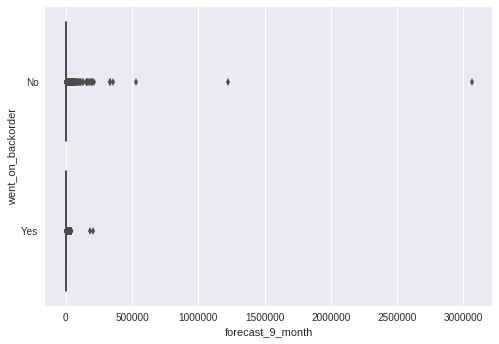

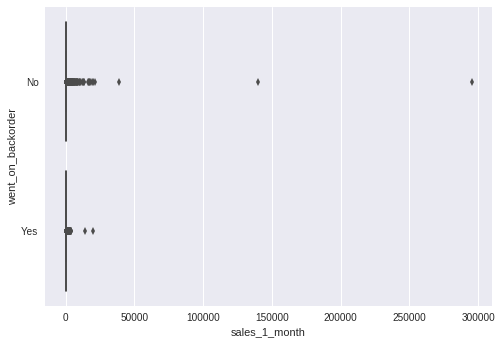

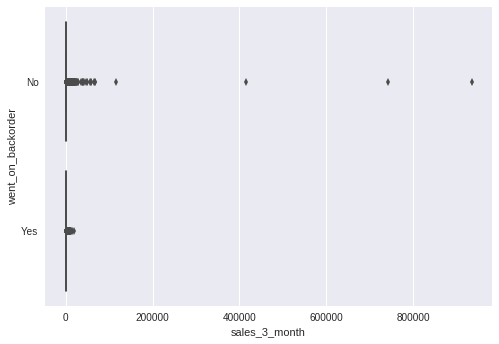

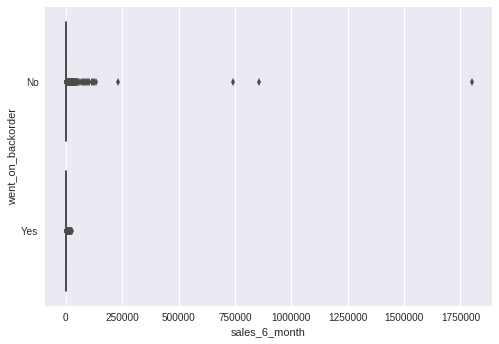

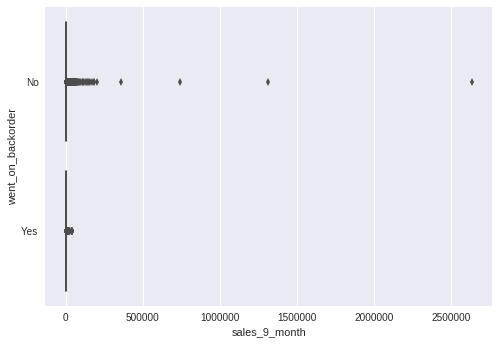

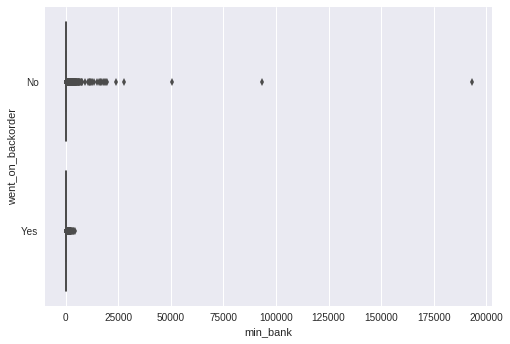

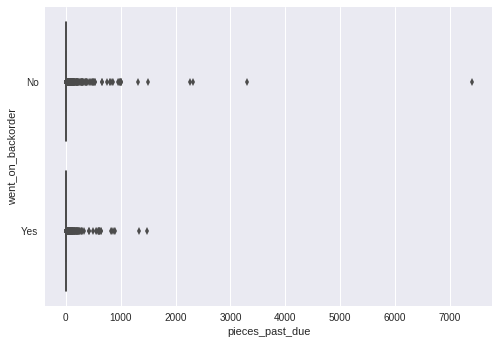

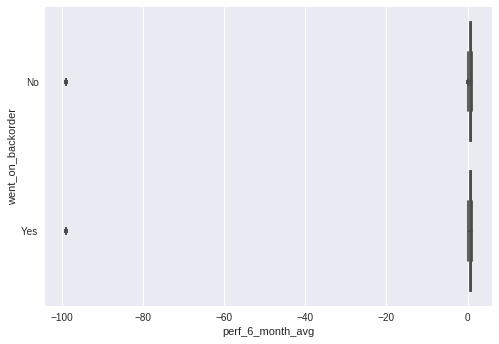

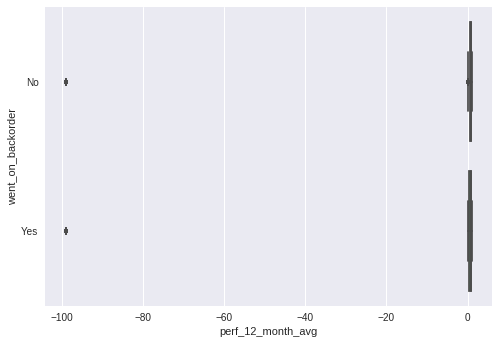

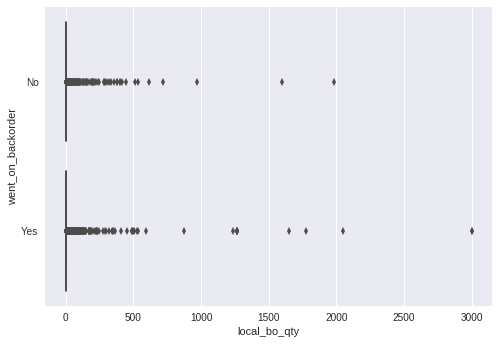

In [12]:
cols = list(BackOrders.select_dtypes(include=['int', 'float']).columns)

for col in cols:
  plt.figure()
  sns.boxplot(x=col, y="went_on_backorder", data=BackOrders)

In [0]:
cols = list(BackOrders.select_dtypes(include=['int', 'float']).columns)

cols = [e for e in cols if e not in ("local_bo_qty", "lead_time", "sku")]


Using quantile methods for outier treatment.
Outlier treatment on new data to compare with old dataset

In [0]:
BackOrders_Out = pd.read_csv("/content/drive/My Drive/Colab_Folder/BackOrders.csv", na_values=["?",","])
BackOrders_Out['lead_time'] = BackOrders_Out.groupby(['stop_auto_buy', 'rev_stop', 'oe_constraint'])['lead_time'].transform(lambda x: x.fillna(x.mean()))

In [0]:
def outliers_iqr(cols, df):
  for col in cols:
    quartile_1 = df[col].quantile(0.25) 
    quartile_3 = df[col].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    median = df[col].median()
    df[col] = df[col].mask(df[col] > upper_bound, median)
    df[col] = df[col].mask(df[col] < lower_bound, median)   
  return

In [0]:
outliers_iqr(cols, BackOrders_Out)

Comparing summary to check effect of outlier treatment

In [17]:

print(pd.concat([pd.DataFrame(BackOrders.describe()), pd.DataFrame(BackOrders_Out.describe())]))

                sku   national_inv     lead_time  in_transit_qty  \
count  6.158900e+04   61589.000000  61589.000000    61589.000000   
mean   2.037188e+06     287.721882      7.679858       30.192843   
std    6.564178e+05    4233.906931      6.414996      792.869253   
min    1.068628e+06   -2999.000000      0.000000        0.000000   
25%    1.498574e+06       3.000000      4.000000        0.000000   
50%    1.898033e+06      10.000000      8.000000        0.000000   
75%    2.314826e+06      57.000000      8.000000        0.000000   
max    3.284895e+06  673445.000000     52.000000   170976.000000   
count  6.158900e+04   61589.000000  61589.000000    61589.000000   
mean   2.037188e+06      18.053646      7.679858        0.000000   
std    6.564178e+05      27.157908      6.414996        0.000000   
min    1.068628e+06     -75.000000      0.000000        0.000000   
25%    1.498574e+06       3.000000      4.000000        0.000000   
50%    1.898033e+06      10.000000      8.000000

No     50296
Yes    11293
Name: went_on_backorder, dtype: int64


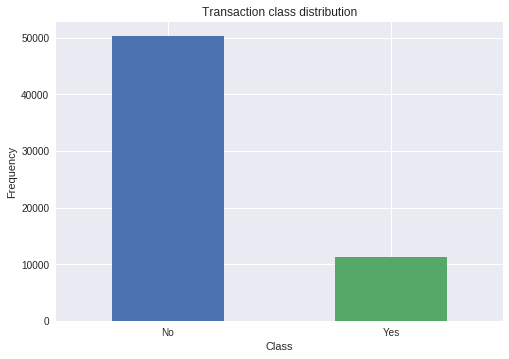

In [18]:
#Plotting the frequencies of orders which went into backorder and which did not
count_classes = pd.value_counts(BackOrders_Out['went_on_backorder'], sort = True)
print(count_classes)

#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0)

#Giving titles and labels to the plot
plt.title("Transaction class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

Implementing "Fraud detection autoencoder approach"

Creating training and test set and separating two classes i.e. went_on_backorder = ['no', 'yes']

In [19]:
train, test = train_test_split(BackOrders_Out, test_size=0.2, random_state=12345)
print(train.shape)
print(test.shape)

(49271, 23)
(12318, 23)


In [0]:
# removing sku column
# train = train.iloc[:, :-"sku"]
train = train.drop("sku", axis=1)
# train.head(5)
test = test.drop("sku", axis=1)
# train.head(5)

Let us consider  went_on_backorder =  'yes' as rare class and separate the two classes to fit an autoencoder

In [21]:
#Now consider only the non-fraud records for training
train_No = train.loc[train["went_on_backorder"] == "No"]
print(train_No.shape)

# #Now consider only the non-fraud records for training
train_Yes = train.loc[train["went_on_backorder"] == "Yes"]
# train_Yes = train_Yes[:,"went_on_backorder"]
print(train_Yes.shape)

(40158, 22)
(9113, 22)


In [22]:
X_train_No = train_No.iloc[:, :-1] #removing target column
print(X_train_No.shape)

(40158, 21)


Clubbing test data with went_on_backorder =  'yes' of train data to ensure that the model is only trained on went_on_backorder =  'no'

In [23]:
test1 = pd.concat([train_Yes, test])
print(test1.shape)

(21431, 22)


In [0]:
X_test,X_eval = train_test_split(test1, test_size=0.2, random_state=1111)

In [0]:
#Separating the independent and the class variable
y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:, :-1]

Converting "category" columns to dummy variables

In [0]:
X_train_No = pd.get_dummies(X_train_No)
X_test = pd.get_dummies(X_test)

Scaling the datasets

In [0]:
x = X_train_No.values #returns a numpy array
min_max_scaler_train = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler_train.fit_transform(x)
X_train_No_scaled = pd.DataFrame(x_scaled, columns=X_train_No.columns)


In [0]:
x = X_test.values #returns a numpy array
min_max_scaler_test = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler_test.fit_transform(x)
X_test_scaled = pd.DataFrame(x_scaled, columns=X_test.columns)

Training Autoencoders

In [0]:
input_dim = X_train_No_scaled.shape[1]
encoding_dim = 15


Simple autoencoder: similar to "Fraud Detection Exercise"

In [0]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [0]:
nb_epoch = 40
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [105]:
hist = []
training_loss = []
val_loss = []

for _ in range(nb_epoch):
    history = autoencoder.fit(X_train_No_scaled, X_train_No_scaled,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1)
#     print(type(history.history['loss']))
    
    hist.append(history)
    
    training_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 72us/step - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 1s 53us/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 54us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 54us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 1s 53us/step - loss: 0.0102 -

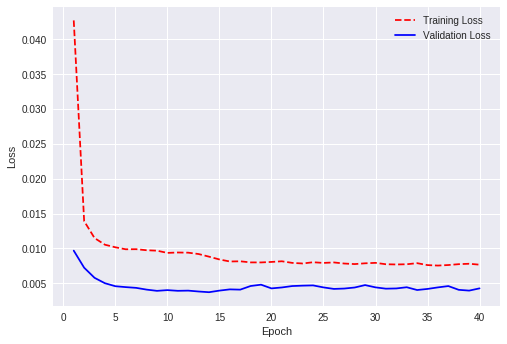

In [107]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Fitting slightly complex autoencoder architecture

In [0]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(int(encoding_dim / 2), activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='linear'))

In [0]:
nb_epoch = 15
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [114]:
hist = []
training_loss = []
val_loss = []

for _ in range(nb_epoch):
    history = autoencoder.fit(X_train_No_scaled, X_train_No_scaled,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1)
#     print(type(history.history['loss']))
    
    hist.append(history)
    
    training_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 86us/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 59us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 59us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 59us/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 59us/step - loss: 0.0126 -

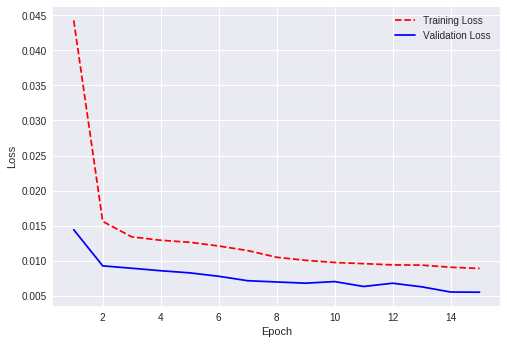

In [115]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Testing is the trained autoencoder is able to differentiate between classes

In [0]:
x_tr_inv = min_max_scaler_train.inverse_transform(X_train_No_scaled)
X_train_No_Unscaled = pd.DataFrame(x_tr_inv, columns=X_train_No_scaled.columns)
x_test_inv = min_max_scaler_test.inverse_transform(X_test_scaled)
X_test_Unscaled = pd.DataFrame(x_test_inv, columns=X_test_scaled.columns)

In [31]:
y_test1 = pd.DataFrame(y_test)

df1= X_test_Unscaled
y_test1 = y_test1.set_index(df1.index)
df1['went_on_backorder'] = y_test1.iloc[:,0].values


test_yes=df1.loc[df1["went_on_backorder"] == "Yes"]
print(test_yes.shape)

test_no=df1.loc[df1["went_on_backorder"] == "No"]
print(test_no.shape)

(9039, 28)
(8105, 28)


In [145]:
#Getting the errors from the went_on_order = 'no' data separately 
autoencoder.evaluate(test_no.iloc[:,:-1],test_no.iloc[:,:-1])

8105/8105 [==============================] - 0s 36us/step


[91.43305254117858, 91.43305254117858]

In [146]:
#Getting the errors from the non fraud data separately 
autoencoder.evaluate(test_yes.iloc[:,:-1],test_yes.iloc[:,:-1])

9039/9039 [==============================] - 0s 37us/step


[195.11564041679577, 195.11564041679577]

In [0]:
#Obtaining predictions for non fraud records
predictions_no=autoencoder.predict(test_no.iloc[:,:-1])
predictions_yes=autoencoder.predict(test_yes.iloc[:,:-1])                                              

In [148]:
#Computing errors on the non-fraud data
errors_no = np.mean(np.square(np.abs(test_no.iloc[:,:-1]-predictions_no)), axis=1)
errors_no[0:5]

0      31.513182
2       0.113370
5     406.367704
10    345.111207
15      6.836983
dtype: float64

In [149]:
#Computing errors on the non-fraud data
errors_yes = np.mean(np.square(np.abs(test_yes.iloc[:,:-1]-predictions_yes)), axis=1)
errors_yes[0:5]

1      2.656642
3     30.592928
4      5.750629
6    241.746106
7    245.603599
dtype: float64

In [150]:
#Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_no))
print(np.max(errors_no))
print(np.median(errors_no))

print(np.min(errors_yes))
print(np.max(errors_yes))
print(np.median(errors_yes))

0.007808775834683409
95401.72910181973
7.234021775123129
0.019357049639780504
335100.5882233833
21.116020287832587


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


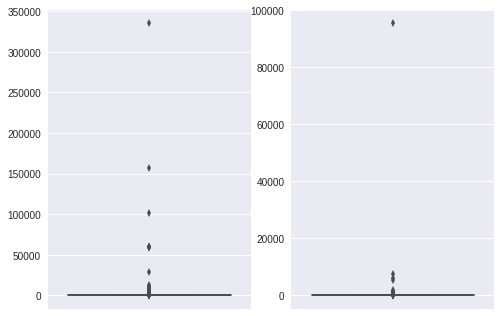

In [151]:
#PLotting the error box plots 
plt.subplot(1, 2, 1)
sns.boxplot(y=errors_yes)


plt.subplot(1, 2, 2)
sns.boxplot(y=errors_no)

In [152]:
print(errors_yes.quantile(np.linspace(.1, 1, 9, 0)))
print(errors_no.quantile(np.linspace(.1, 1, 9, 0)))

0.1      1.506680
0.2      3.599290
0.3      6.159812
0.4     11.225965
0.5     21.116020
0.6     39.933883
0.7     74.998334
0.8    141.799857
0.9    259.898439
dtype: float64
0.1      0.958480
0.2      1.853876
0.3      3.834726
0.4      5.416584
0.5      7.234022
0.6     16.182710
0.7     39.668759
0.8    107.429438
0.9    277.791424
dtype: float64


Implementing autoencoders with hyperparameters Dropout with Maxnorm Constraints and Batch
Normalization

In [0]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='tanh', activity_regularizer=regularizers.l1(10e-5)))
# autoencoder.add(BatchNormalization())
autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(int(encoding_dim / 2), activation='relu', kernel_constraint=maxnorm(3)))
autoencoder.add(BatchNormalization())
# autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(encoding_dim, activation='tanh'))
# autoencoder.add(BatchNormalization())
autoencoder.add(Dense(input_dim, activation='linear'))

In [0]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu', kernel_constraint=maxnorm(3)))
autoencoder.add(BatchNormalization())
autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(int(encoding_dim / 2), activation='relu', kernel_constraint=maxnorm(3)))
autoencoder.add(BatchNormalization())
# autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(encoding_dim, activation='relu', kernel_constraint=maxnorm(3)))
# autoencoder.add(BatchNormalization())
autoencoder.add(Dense(input_dim, activation='linear'))

In [0]:
nb_epoch = 80
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mse'])

In [142]:
hist = []
training_loss = []
val_loss = []

for _ in range(nb_epoch):
    history = autoencoder.fit(X_train_No_scaled, X_train_No_scaled,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1)
#     print(type(history.history['loss']))
    
    hist.append(history)
    
    training_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 4s 128us/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 78us/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 87us/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 88us/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 2s 88us/step - loss: 0.0162 

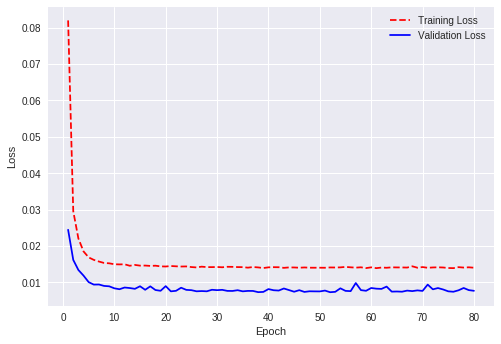

In [139]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

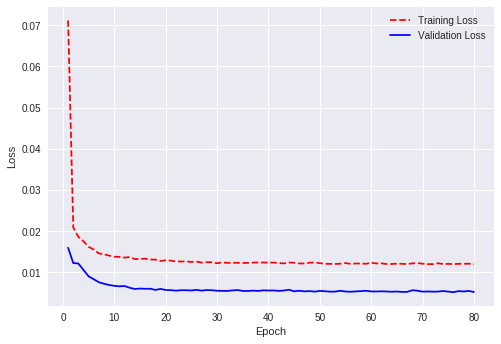

In [143]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Experimenting with other hyperparameters
1 - Learning rate

In [38]:
lr_values = np.logspace(-4, -1, num=6)
lr_values

array([0.0001    , 0.00039811, 0.00158489, 0.00630957, 0.02511886,
       0.1       ])

In [0]:
lr_values = [0.001, 0.003, 0.006]

In [0]:
nb_epoch = 20
batch_size = 32

def compile_fit(model, X, Y, lr_value):
    
    adam = optimizers.Adam(lr=lr_value)
    
    autoencoder.compile(optimizer=adam, 
                    loss='mean_squared_error', metrics=['mse'])
    
    history = autoencoder.fit(X, Y,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1)    
    return history
  


In [47]:
# history = []
# for lr_value in lr_values:
#   print(lr_value)
#   history.append(compile_fit(autoencoder, X_train_No_scaled, X_train_No_scaled, lr_value))
  
  
hist = []
training_loss = []
val_loss = []

for lr_value in lr_values:
    print(lr_value)
    history = (compile_fit(autoencoder, X_train_No_scaled, X_train_No_scaled, lr_value))
  
    hist.append(history)
  
    training_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])

0.001
Train on 28110 samples, validate on 12048 samples
Epoch 1/20
28110/28110 [==============================] - 17s 599us/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2/20
28110/28110 [==============================] - 15s 533us/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 3/20
28110/28110 [==============================] - 15s 542us/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 4/20
28110/28110 [==============================] - 14s 513us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5/20
28110/28110 [==============================] - 14s 514us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6/20
28110/28110 [==============================] - 15s 519us/step - loss: 0.0157 - mean_squa

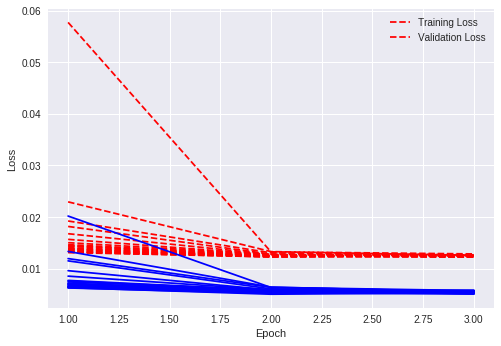

In [48]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

From above experiments, following hyperparameters are giving good results
1 - 'relu' activation function
2 - Autoencoder with two hidden layers in each of encoder and decoder
3 - Dropout of 0.2
4 - kernel_constraint=maxnorm(3)
5 - Batch Normalization in Encoder part
6 - Learning rate of = 0.003
7 - Batch Size = 32

In [51]:
autoencoder = Sequential()

autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))
autoencoder.add(Dense(encoding_dim, activation='relu', kernel_constraint=maxnorm(3)))
autoencoder.add(BatchNormalization())
autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(int(encoding_dim / 2), activation='relu', kernel_constraint=maxnorm(3)))
autoencoder.add(BatchNormalization())
# autoencoder.add(Dropout(0.2))
autoencoder.add(Dense(encoding_dim, activation='relu', kernel_constraint=maxnorm(3)))
# autoencoder.add(BatchNormalization())
autoencoder.add(Dense(input_dim, activation='linear'))



nb_epoch = 50
batch_size = 32

def compile_fit(model, X, Y):
    
    adam = optimizers.Adam(lr=0.003)
    
    autoencoder.compile(optimizer=adam, 
                    loss='mean_squared_error', metrics=['mse'])
    
    history = autoencoder.fit(X, Y,
                    epochs=1,
                    batch_size=batch_size,
                    shuffle=True,
                     validation_split=0.3,
                    verbose=1)    
    return history
  
hist = []
training_loss = []
val_loss = []

for _ in range(nb_epoch):
    history = (compile_fit(autoencoder, X_train_No_scaled, X_train_No_scaled))
  
    hist.append(history)
  
    training_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
  

Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 17s 589us/step - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 17s 594us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 17s 596us/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 17s 605us/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Train on 28110 samples, validate on 12048 samples
Epoch 1/1
28110/28110 [==============================] - 17s 610us/step - loss

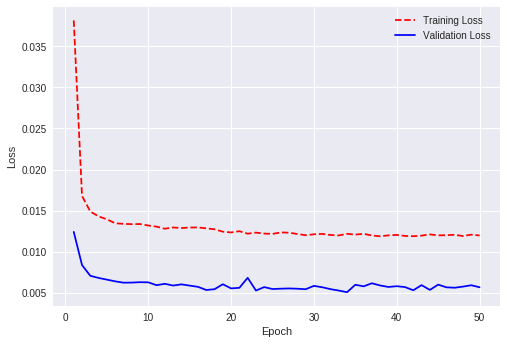

In [52]:
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();